# USING THE NEW YORK TIME API, WE WILL ANALYZE SENTIMENT OF THE LAST TWO MONTHS OF THE YEAR FROM 1992-2019 TO PREDICT SENTIMENT FOR 2020.

In [13]:
import os
import pandas as pd
from dotenv import load_dotenv
from nytimesarticle import articleAPI
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
from pathlib import Path

import numpy as np
import hvplot.pandas

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
load_dotenv()

True

In [14]:
#called api key
nyt_api_key = os.getenv("NYT_API")

api= articleAPI(nyt_api_key)

api

In [15]:
# pulled articles from NYT (90s)
articles_92 = api.search(q="holiday sales",begin_date=19921101, end_date=19921231)
articles_93 = api.search(q="holiday sales",begin_date=19931101, end_date=19931231)
articles_94 = api.search(q="holiday sales",begin_date=19941101, end_date=19941231)
articles_95 = api.search(q="holiday sales",begin_date=19951101, end_date=19951231)
articles_96 = api.search(q="holiday sales",begin_date=19961101, end_date=19961231)
articles_97 = api.search(q="holiday sales",begin_date=19971101, end_date=19971231)
articles_98 = api.search(q="holiday sales",begin_date=19981101, end_date=19981231)
articles_99 = api.search(q="holiday sales",begin_date=19991101, end_date=19991231)

In [16]:
# pulled articles from NYT(00s)
articles_00 = api.search(q="holiday sales",begin_date=20001101, end_date=20001231)
articles_01 = api.search(q="holiday sales",begin_date=20011101, end_date=20011231)
articles_02 = api.search(q="holiday sales",begin_date=20021101, end_date=20021231)
articles_03 = api.search(q="holiday sales",begin_date=20031101, end_date=20031231)
articles_04 = api.search(q="holiday sales",begin_date=20041101, end_date=20041231)
articles_05 = api.search(q="holiday sales",begin_date=20051101, end_date=20051231)
articles_06 = api.search(q="holiday sales",begin_date=20061101, end_date=20061231)
articles_07 = api.search(q="holiday sales",begin_date=20071101, end_date=20071231)
articles_08 = api.search(q="holiday sales",begin_date=20081101, end_date=20081231)
articles_09 = api.search(q="holiday sales",begin_date=20091101, end_date=20091231)


In [17]:
#pulled articles for NYT (00-19)
articles_10 = api.search(q="holiday sales",begin_date=20101101, end_date=20101231)
articles_11 = api.search(q="holiday sales",begin_date=20111101, end_date=20111231)
articles_12 = api.search(q="holiday sales",begin_date=20121101, end_date=20121231)
articles_13 = api.search(q="holiday sales",begin_date=20131101, end_date=20131231)
articles_14 = api.search(q="holiday sales",begin_date=20141101, end_date=20141231)
articles_15 = api.search(q="holiday sales",begin_date=20151101, end_date=20151231)
articles_16 = api.search(q="holiday sales",begin_date=20161101, end_date=20161231)
articles_17 = api.search(q="holiday sales",begin_date=20171101, end_date=20171231)
articles_18 = api.search(q="holiday sales",begin_date=20181101, end_date=20181231)
articles_19 = api.search(q="holiday sales",begin_date=20191101, end_date=20191231)


In [18]:
articles_92


{'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [], 'meta': {'hits': 0, 'offset': 0, 'time': 15}}}

In [19]:
# Dataframe for 92
articles92= articles_92['response']
articles_df_92 = pd.DataFrame(articles92['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])

articles_df_92.head()

KeyError: 'pub_date'

In [20]:
# Dataframe for 93
articles93= articles_93['response']
articles_df_93 = pd.DataFrame(articles93['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_93.head()

KeyError: 'pub_date'

In [ ]:
# Dataframe for 94
articles94= articles_94['response']
articles_df_94 = pd.DataFrame(articles94['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_94.head()

In [ ]:
# Dataframe for 95
articles95= articles_95['response']
articles_df_95 = pd.DataFrame(articles95['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_95.head()

In [ ]:
# Dataframe for 96
articles96= articles_96['response']
articles_df_96 = pd.DataFrame(articles96['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_96.head()

In [ ]:
# Dataframe for 97
articles97= articles_97['response']
articles_df_97 = pd.DataFrame(articles97['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_97.head()

In [ ]:
# Dataframe for 98
articles98= articles_98['response']
articles_df_98 = pd.DataFrame(articles98['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_98.head()

In [ ]:
# Dataframe for 99
articles99= articles_99['response']
articles_df_99 = pd.DataFrame(articles99['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_99.head()

In [ ]:
# Dataframe for 00
articles00= articles_00['response']
articles_df_00 = pd.DataFrame(articles00['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_00.head()

In [ ]:
# Dataframe for 01
articles01= articles_01['response']
articles_df_01 = pd.DataFrame(articles01['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_01.head()

In [ ]:
# Dataframe for 02
articles02= articles_02['response']
articles_df_02 = pd.DataFrame(articles02['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_02.head()

In [ ]:
# Dataframe for 03
articles03= articles_03['response']
articles_df_03 = pd.DataFrame(articles03['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_03.head()

In [ ]:
# Dataframe for 04
articles04= articles_04['response']
articles_df_04 = pd.DataFrame(articles04['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_04.head()

In [ ]:
# Dataframe for 05
articles05= articles_05['response']
articles_df_05 = pd.DataFrame(articles05['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_05.head()

In [ ]:
# Dataframe for 06
articles06= articles_06['response']
articles_df_06 = pd.DataFrame(articles06['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_06.head()

In [ ]:
# Dataframe for 07
articles07= articles_07['response']
articles_df_07 = pd.DataFrame(articles07['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_07.head()

In [ ]:
# Dataframe for 08
articles08= articles_08['response']
articles_df_08 = pd.DataFrame(articles08['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_08.head()

In [ ]:
# Dataframe for 09
articles09= articles_09['response']
articles_df_09 = pd.DataFrame(articles09['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_09.head()

In [ ]:
# Dataframe for 10
articles10= articles_10['response']
articles_df_10 = pd.DataFrame(articles10['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_10.head()

In [ ]:
# Dataframe for 11
articles11= articles_11['response']
articles_df_11 = pd.DataFrame(articles11['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_11.head()

In [ ]:
# Dataframe for 12
articles12= articles_12['response']
articles_df_12 = pd.DataFrame(articles12['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_12.head()

In [ ]:
# Dataframe for 13
articles13= articles_13['response']
articles_df_13 = pd.DataFrame(articles13['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_13.head()

In [ ]:
# Dataframe for 14
articles14= articles_14['response']
articles_df_14 = pd.DataFrame(articles14['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_14.head()

In [ ]:
# Dataframe for 15
articles15= articles_15['response']
articles_df_15 = pd.DataFrame(articles15['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_15.head()

In [ ]:
# Dataframe for 16
articles16= articles_16['response']
articles_df_16 = pd.DataFrame(articles16['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_16.head()

In [ ]:
# Dataframe for 17
articles17= articles_17['response']
articles_df_17 = pd.DataFrame(articles17['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_17.head()

In [ ]:
# Dataframe for 18
articles18= articles_18['response']
articles_df_18 = pd.DataFrame(articles18['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_18.head()

In [ ]:
# Dataframe for 19
articles19= articles_19['response']
articles_df_19 = pd.DataFrame(articles19['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_19.head()

In [ ]:
#concat all dataframes into one

NYT_articles= pd.concat([articles_df_92,articles_df_93,articles_df_94, articles_df_95, articles_df_96,articles_df_97,articles_df_98,articles_df_99,articles_df_00
                        ,articles_df_01,articles_df_02, articles_df_03, articles_df_04, articles_df_05
                        ,articles_df_06, articles_df_07, articles_df_08, articles_df_09
                        , articles_df_10,articles_df_11, articles_df_12, articles_df_13,articles_df_14,articles_df_15
                        ,articles_df_16, articles_df_17, articles_df_18,articles_df_19])
NYT_articles.head()

In [ ]:
# clean up data

NYT_articles.isnull().sum()


In [ ]:
# create a dataframe with just the abstract.

NYT_abstract= NYT_articles.drop(columns=['headline','keywords','lead_paragraph'])
NYT_abstract.head()

In [ ]:
NYT_abstract.reset_index().head()

In [ ]:
# function to get sentiment from dataframe NYT_abstract

def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [ ]:
# created sentiment scores for "abstract" and a new dataframe with scores.

nltk_results=[nltk_sentiment(abstract) for abstract in NYT_abstract["abstract"]]
results_df = pd.DataFrame(nltk_results)

nltk_df = results_df.join(NYT_abstract.reset_index())
nltk_df= nltk_df[['pub_date', 'abstract','compound', 'neg', 'neu', 'pos']]
nltk_df.head()

In [ ]:
nltk_df.to_csv("NYT_nlk_updated")

In [ ]:
nltk_df.describe()

In [ ]:
nltk_df.to_csv("NYT_updated.csv")

In [21]:
# loading full data

file_path=Path("NEW_Nov_Dec_NLTK_Average_Sentiment_Score_2.csv")
NYTIMES_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
NYTIMES_df=NYTIMES_df.set_index('DATE').sort_values('DATE',ascending=True)
NYTIMES_df.head()

,compound
DATE,
11/1/1992,0.812100
11/1/1993,0.762175
11/1/1994,0.667100
11/1/1995,0.485533
11/1/1996,0.722600


In [22]:
file_path=Path("nov_dec_featuress.csv")
Nov_dec_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
Nov_dec_df=Nov_dec_df.set_index('DATE').sort_values('DATE',ascending=True)
Nov_dec_df.head()

,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,
11/1/1992,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
11/1/1993,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
11/1/1994,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372
11/1/1995,189055.0,1.06225,88.2,5.6,153.7,85.37,5.594352,2.2,10737.478
11/1/1996,200174.0,1.23225,99.2,5.4,158.7,87.88,5.777011,4.4,11212.205


In [23]:
Main_df= NYTIMES_df.join( Nov_dec_df,sort=False)
Main_df.head()

,compound,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,,
11/1/1992,0.812100,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
11/1/1993,0.762175,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
11/1/1994,0.667100,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372
11/1/1995,0.485533,189055.0,1.06225,88.2,5.6,153.7,85.37,5.594352,2.2,10737.478
11/1/1996,0.722600,200174.0,1.23225,99.2,5.4,158.7,87.88,5.777011,4.4,11212.205


In [24]:
#Hodrick-Prescott filter on columns "y_monthly_retail" , "CPI", 'GDP_growth', 'GDPC1'
import statsmodels.api as sm
ts_noise1, ts_trend1 = sm.tsa.filters.hpfilter(Main_df['y_monthly_retail'])
ts_noise2, ts_trend2 = sm.tsa.filters.hpfilter(Main_df['CPI'])
ts_noise4, ts_trend4 = sm.tsa.filters.hpfilter(Main_df['GDPC1'])

In [25]:
Main_df['Sales']= ts_noise1
Main_df['CPI']= ts_noise2
Main_df['GDP']= ts_noise4
Main_df= Main_df.drop(columns={'y_monthly_retail','GDPC1'})
Main_df= Main_df.rename(columns={'Pct_chng_prv_yr':'GDP_growth', 'Sales':'sales', 'compound':'NYT_sentiment', 'dow_index':'retail_index'})
Main_df.tail()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP
DATE,,,,,,,,,,
12/1/2015,-0.421500,2.03750,92.6,5.0,2.003644,98.745,5.399252,2.2,8444.025888,257.481420
12/1/2016,0.302650,2.25425,98.2,4.7,2.737403,102.286,5.591750,2.1,13296.818400,305.310794
12/1/2017,0.000000,2.47675,95.9,4.1,3.636880,91.826,5.576678,2.7,23557.309410,471.852246
12/1/2018,0.346600,2.36560,98.3,3.9,4.197560,95.735,5.520130,2.5,14725.149369,608.339093
12/1/2019,0.222725,2.55500,99.3,3.5,5.739651,96.058,5.614131,2.3,28358.265413,729.914743


In [26]:
Main_df.to_csv("Main_df.csv")

In [97]:
file_path=Path("MAIN_DF_WITH_GOLD.csv")
MAIN_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
MAIN_df=MAIN_df.set_index('DATE').sort_values('DATE',ascending=True).drop(columns={'Unnamed: 0'})
MAIN_df.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns
DATE,,,,,,,,,,,
11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,0.000000,4.660212,4.4,-18182.99304,-576.109447,0.000000
11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956
11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500
11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632
11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389


## DECISION TREE

In [85]:
# Define features set
X = MAIN_df.copy()
X.drop({"sales"}, axis=1, inplace=True)

X.head()


,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,GDP,Gold_Returns
DATE,,,,,,,,,,
11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,0.000000,4.660212,4.4,-576.109447,0.000000
11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-676.804025,0.069956
11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-618.354534,0.058500
11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-742.978904,-0.006632
11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-621.669592,-0.011389


In [86]:
# Define target vector
y = MAIN_df["sales"].values.reshape(-1, 1)
y[:5]


array([[-18182.99304],
       [-15860.78098],
       [-12429.20455],
       [-14721.98639],
       [-14186.08089]])

In [87]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [88]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
DecisionRegressor = model.fit(X_train, y_train)




In [89]:
# Making predictions using the testing data
predictions = DecisionRegressor.predict(X_test)



In [90]:
Predictions_tree=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_tree.head()

,Prediction,Actual
0,-27909.14982,-24116.553180
1,14695.30502,13296.818400
2,47667.32448,87065.740710
3,-14721.98639,10382.970910
4,23554.14551,4820.265943


<AxesSubplot:>

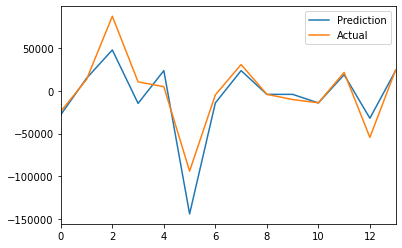

In [91]:
Predictions_tree.plot()

In [92]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, predictions)


0.745755446603428

In [93]:
mse = mean_squared_error(y_test, predictions)
mse

409789556.65769035

In [94]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

20243.259536391128

## NEW DF FOR PREDICTIVE MODEL

In [188]:
Main_2= MAIN_df.copy()
Main_2['shifted_sales']= Main_2.sales.shift()
Main_2=Main_2.dropna()
Main_2=Main_2.reset_index()
Main_2.head()

,DATE,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns,shifted_sales
0,11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956,-18182.99304
1,11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500,-15860.78098
2,11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632,-12429.20455
3,11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389,-14721.98639
4,11/1/1997,0.855950,1.17075,107.2,4.6,-5.541533,0.112995,5.705666,4.5,-15907.24120,-467.952693,-0.168962,-14186.08089


In [189]:
Main_2['DATE'] =pd.to_datetime(Main_2.DATE)
Main_2= Main_2.set_index("DATE")

Main_2.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns,shifted_sales
DATE,,,,,,,,,,,,
1993-11-01,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956,-18182.99304
1994-11-01,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500,-15860.78098
1995-11-01,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632,-12429.20455
1996-11-01,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389,-14721.98639
1997-11-01,0.855950,1.17075,107.2,4.6,-5.541533,0.112995,5.705666,4.5,-15907.24120,-467.952693,-0.168962,-14186.08089


In [191]:
Main_2= Main_2.sort_index()
Main_2.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns,shifted_sales
DATE,,,,,,,,,,,,
1992-12-01,0.458857,1.07750,91.0,7.4,-55.865683,-0.044113,4.660212,4.4,-143836.96580,-4628.850176,-0.770981,155602.46170
1993-11-01,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956,-18182.99304
1993-12-01,0.500550,1.01400,88.2,6.5,-49.461028,0.038244,4.755414,2.6,-125760.23380,-4202.521831,0.114896,-143836.96580
1994-11-01,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500,-15860.78098
1994-12-01,0.366667,1.09050,95.1,5.5,-43.478215,-0.089986,5.120072,4.1,-107366.16520,-3636.164463,0.018762,-125760.23380


# DECISION TREE MODEL PREDICTIVE MODEL (SHIFTED Y)

In [192]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,GDP,Gold_Returns
DATE,,,,,,,
1992-12-01,0.458857,7.4,-55.865683,4.660212,4.4,-4628.850176,-0.770981
1993-11-01,0.762175,6.6,-4.077295,4.755414,2.6,-676.804025,0.069956
1993-12-01,0.500550,6.5,-49.461028,4.755414,2.6,-4202.521831,0.114896
1994-11-01,0.667100,5.6,-4.587534,5.120072,4.1,-618.354534,0.058500
1994-12-01,0.366667,5.5,-43.478215,5.120072,4.1,-3636.164463,0.018762


In [193]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


array([[ 155602.4617 ],
       [ -18182.99304],
       [-143836.9658 ],
       [ -15860.78098],
       [-125760.2338 ]])

In [194]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [195]:
X_test.shape

(14, 7)

In [196]:
X_train.shape

(41, 7)

In [197]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
DecisionRegressor = model.fit(X_train, y_train)




In [198]:
# Making predictions using the testing data
predictions = DecisionRegressor.predict(X_test)



In [199]:
Predictions_tree=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_tree.head()

,Prediction,Actual
0,-12957.246610,4820.265943
1,21482.947170,24356.842720
2,-4139.194174,-10306.371500
3,116289.428200,87065.740710
4,-4842.438969,-27909.149820


<AxesSubplot:>

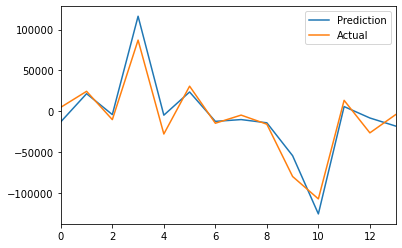

In [200]:
Predictions_tree.plot()

In [201]:
predictions

array([ -12957.24661 ,   21482.94717 ,   -4139.194174,  116289.4282  ,
         -4842.438969,   23554.14551 ,  -12429.20455 ,  -10241.50053 ,
        -14186.08089 ,  -54482.40899 , -125760.2338  ,    5678.009712,
         -8292.319532,  -18182.99304 ])

In [202]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, predictions)


0.8786481710499019

In [203]:
mse = mean_squared_error(y_test, predictions)
mse

243538750.19026047

In [204]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

15605.728121118234

# RANDOM FOREST MODEL

In [205]:
# Define features set
X = Main_df.copy()
X.drop({"sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = Main_df["sales"].values.reshape(-1, 1)
y[:5]



array([[-18182.99304049],
       [-15860.78098196],
       [-12429.20455277],
       [-14721.98639417],
       [-14186.08089454]])

In [206]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


## Fitting the Random Forest Model

In [207]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


<AxesSubplot:>

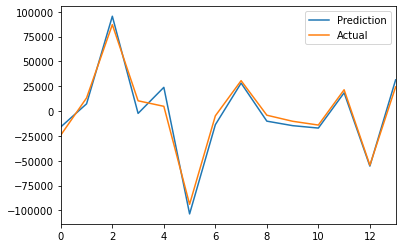

In [208]:

Predictions_forest=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_forest.plot()

## EVALUATING RANDOM FOREST

In [209]:
r2_score(y_test, predictions)


0.9554075279949993

In [210]:
mse = mean_squared_error(y_test, predictions)
mse

71873828.12550409

In [211]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

8477.843365237653

## RANDOM FOREST PREDICTIVE MODEL

In [212]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,GDP,Gold_Returns
DATE,,,,,,,
1992-12-01,0.458857,7.4,-55.865683,4.660212,4.4,-4628.850176,-0.770981
1993-11-01,0.762175,6.6,-4.077295,4.755414,2.6,-676.804025,0.069956
1993-12-01,0.500550,6.5,-49.461028,4.755414,2.6,-4202.521831,0.114896
1994-11-01,0.667100,5.6,-4.587534,5.120072,4.1,-618.354534,0.058500
1994-12-01,0.366667,5.5,-43.478215,5.120072,4.1,-3636.164463,0.018762


In [213]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


array([[ 155602.4617 ],
       [ -18182.99304],
       [-143836.9658 ],
       [ -15860.78098],
       [-125760.2338 ]])

In [214]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [215]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data
predictions_1 = rf_model.predict(X_test)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


<AxesSubplot:>

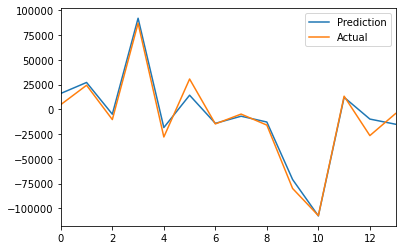

In [216]:

Predictions_forest=pd.DataFrame({"Prediction": predictions_1, "Actual": y_test.ravel()}).head(20)
Predictions_forest.plot()

In [217]:
r2_score(y_test, predictions_1)


0.9628939513351432

In [218]:
mse = mean_squared_error(y_test, predictions_1)
mse

74467445.56321658

In [219]:
mse= mean_squared_error(y_test, predictions_1)
rmse= np.sqrt(mse)
rmse

8629.452216868494

In [230]:
X_P= Main_2.tail(2)
X_P

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns,shifted_sales
DATE,,,,,,,,,,,,
2019-11-01,0.000000,2.59775,96.8,3.5,57.165400,0.010350,5.614131,2.3,155602.46170,4612.023799,0.186882,136264.76990
2019-12-01,0.222725,2.55500,99.3,3.5,5.739651,0.003374,5.614131,2.3,28358.26541,729.914743,0.266333,14725.14937


In [232]:
predictions_end = rf_model.predict(X)
predictions_end

array([  54944.84552452,  -13916.33571303, -101407.76352706,
        -16159.75164795, -110716.65222824,  -14233.10371317,
       -107675.28276355,  -14146.86076554,  -88727.10719252,
        -13632.41496685,  -70901.57016347,  -12791.34639226,
        -63163.4103279 ,  -12224.37430836,  -50377.78350674,
         -6923.25764525,  -27951.00081986,   -7770.50772708,
        -18371.32886851,  -15043.74023048,  -20461.93277406,
         -9335.21603985,  -15698.94515781,   -2192.97378871,
         -4892.1908865 ,    6784.17906909,    6430.35648868,
         15202.80732776,   14733.481425  ,   17646.5483508 ,
         19196.96155336,   14300.40391301,   14364.09584834,
         -7839.58235775,   -9811.54095412,   -6314.09806866,
        -14608.66272231,   16103.1190931 ,   -7718.59528539,
         27173.88432872,   -1585.78428583,   37094.04444547,
          3584.70421286,   53571.73278819,    8070.81945819,
         62077.37030336,   11035.51983019,   71468.99014946,
          8789.13548437,

In [234]:
Predictions_f=pd.DataFrame({"Prediction": predictions_end, "Actual": y.ravel()})
Predictions_f

ValueError: arrays must all be same length

## GRADIENT BOOST MODEL

In [137]:
# Define features set
X = MAIN_df.copy()
X.drop({"sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = MAIN_df["sales"].values.reshape(-1, 1)
y[:5]



array([[-18182.99304],
       [-15860.78098],
       [-12429.20455],
       [-14721.98639],
       [-14186.08089]])

In [138]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)



In [140]:
# Create a regression object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
# Fit the model
regressor.fit(X_train, y_train.ravel())
    
# Make Prediction
predictions = regressor.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,-9682.831053,-24116.553180
1,9448.612192,13296.818400
2,78034.484778,87065.740710
3,5503.467099,10382.970910
4,-17318.629922,4820.265943
5,-50741.570408,-93826.982850
6,-23015.430577,-4767.364590
7,23470.089879,30654.609980
8,-11030.680757,-4139.194174
9,-12044.958789,-10241.500530


In [ ]:
# Choose a learning rate and create regression
classifier = GradientBoostingRegressor(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test)
predict=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
predict.plot()

## EVALUATING THE MODEL

In [141]:
r2_score(y_test, predictions)


0.7951030399567943

In [142]:
mse = mean_squared_error(y_test, predictions)
mse

330251457.8774289

In [143]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

18172.82195690666

## GRADIENT BOOST PREDICTIVE

In [144]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


,NYT_sentiment,unemployment_rate,CPI,Consumer_debt_service,GDP_growth,GDP,Gold_Returns
DATE,,,,,,,
11/1/1993,0.762175,6.6,-4.077295,4.755414,2.6,-676.804025,0.069956
11/1/1994,0.667100,5.6,-4.587534,5.120072,4.1,-618.354534,0.058500
11/1/1995,0.485533,5.6,-4.990644,5.594352,2.2,-742.978904,-0.006632
11/1/1996,0.722600,5.4,-4.278919,5.777011,4.4,-621.669592,-0.011389
11/1/1997,0.855950,4.6,-5.541533,5.705666,4.5,-467.952693,-0.168962


In [145]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


array([[-18182.99304],
       [-15860.78098],
       [-12429.20455],
       [-14721.98639],
       [-14186.08089]])

In [146]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)



In [147]:
# Create a regression object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
# Fit the model
regressor.fit(X_train, y_train.ravel())
    
# Make Prediction
predictions = regressor.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,-3671.929670,-24116.553180
1,9386.449853,-10306.371500
2,69954.907480,87065.740710
3,6930.361035,8986.414982
4,-9237.287671,4820.265943
5,-119454.222917,-93826.982850
6,5708.302902,-4767.364590
7,22488.905814,30654.609980
8,10303.897186,-4139.194174
9,15381.116935,-10241.500530


In [148]:
r2_score(y_test, predictions)


0.5995808818136175

In [149]:
mse = mean_squared_error(y_test, predictions)
mse

627821243.6266602

In [150]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

25056.361340519103